# July 11, 2025()

## Measures of central tendency

### Mean

The average value of all the value in a distribution is called the mean.

 $X̄= \frac {\sum fx}{\sum n}$

In [1]:
def mean(num):
  tot=sum(num)
  length=len(num)
  mean=tot/length
  print("mean:", mean)

### Median

The middle value in a distribution is called the median.

If number of distributions is odd, $Median=t^\frac{n+1}{2}$

If number of distributions is even, $Median=\frac{t^\frac{n}{2}+t^{\frac{n}{2}+1}}{2}$

In [2]:
def median(num):
  sort=sorted(num)
  length=len(num)
  if (length%2==0):
    med=(sort[length//2]+sort[length//2-1])/2
  else:
    med=sort[length//2]
  print("Median:", med)

### Mode

The number with the most frequency in a distribution is called the mode.

In [12]:
def mode(num):
    counts = {}
    for number in num:
        counts[number] = counts.get(number, 0) + 1

    max_frequency = max(counts.values())
    modes = [number for number, freq in counts.items() if freq == max_frequency]

    if len(modes) == 1:
        print(f"Mode: {modes[0]}")
    else:
        print(f"Modes: {modes}")

## Other metrics

### Percentile

$p^{th} percentile=\frac{P*(n+1)}{100}$

In [14]:
import numpy as np

def percentile(data, percent):

  if not isinstance(data, (list, np.ndarray)):
    print("Input data must be a list or numpy array.")
    return
  if not 0 <= percent <= 100:
    print("Percentile must be between 0 and 100.")
    return

  data_sorted = np.sort(data)
  rank = (percent / 100) * (len(data_sorted) - 1)
  if rank.is_integer():
    percentile_value = data_sorted[int(rank)]
  else:
    lower_index = int(np.floor(rank))
    upper_index = int(np.ceil(rank))
    percentile_value = data_sorted[lower_index] + (rank - lower_index) * (data_sorted[upper_index] - data_sorted[lower_index])

  print(f"The {percent}th percentile is: {percentile_value}") # Removed print statement
  return percentile_value

### Quartile (Q1, Q2, Q3)

Q1 is the 1st quarter place of a distribution value. Q2 is none other than the median. Q3 is the third quartile.

In [15]:
import numpy as np
data = [12, 7, 19, 3, 25, 8, 15, 10, 18, 5]
q1 = np.percentile(data, 25)
q2 = np.percentile(data, 50)  # same as median
q3 = np.percentile(data, 75)
print("Q1: ", q1)
print("Q2: ", q2)
print("Q3: ", q3)

Q1:  7.25
Q2:  11.0
Q3:  17.25


### Interquartile range

Interquartile range=Q3-Q1

In [16]:
iqr = q3 - q1
print("Interquartile Range (IQR):", iqr)

Interquartile Range (IQR): 10.0


### Min and Max

* Min

In [17]:
minimum = min(data)
print("Minimum value in the distribution:", minimum)

Minimum value in the distribution: 3


* Max

In [18]:
maximum = max(data)
print("Maximum value in the distribution:", maximum)

Maximum value in the distribution: 25


### Finding outliers using Quartiles

* Lower Bound (Q1-1.5*IQR)

In [20]:
lower_bound = q1 - 1.5 * iqr
print("Lower Bound:", lower_bound)

Lower Bound: -7.75


* Upper Bound (Q3+1.5*IQR)

In [21]:
upper_bound = q3 + 1.5 * iqr
print("Upper Bound:", upper_bound)

Upper Bound: 32.25


Outliers: values lower than LB or higher than UB

### Measures of dispersion

* Range

Range = Maximum - Minimum

In [23]:
data_range = maximum - minimum
print("Range:", data_range)

Range: 22


* Variance

$σ² =\frac{Σ(xᵢ - μ)²}{N}$  

In [24]:
variance = np.var(data, ddof=0)
print("Variance:", variance)

Variance: 43.76


* Standard Deviation

$σ =\sqrt{\frac{Σ(xᵢ - μ)²}{N}}$ 

In [26]:
std_dev = np.sqrt(variance)
print("Standard Deviation:", std_dev)

Standard Deviation: 6.615134163416491


* Z-score (used for standardization)

$Z=\frac{(x - μ)}{σ}$  

In [27]:
z_scores = [(x - q2) / std_dev for x in data]
print("Z-scores:", z_scores)

Z-scores: [np.float64(0.1511685137892251), np.float64(-0.6046740551569004), np.float64(1.2093481103138009), np.float64(-1.2093481103138009), np.float64(2.1163591930491514), np.float64(-0.45350554136767535), np.float64(0.6046740551569004), np.float64(-0.1511685137892251), np.float64(1.0581795965245757), np.float64(-0.9070110827353507)]


* Confidence Interval (CI)

$Z=x̄ ±{z}{\frac{σ}{\sqrt{n}}}$ 

In [29]:
import scipy.stats as stats

# Calculate 95% confidence interval for the mean
confidence = 0.95
n = len(data)
mean = q2
se = std_dev / np.sqrt(n)
h = se * stats.t.ppf((1 + confidence) / 2., n-1)
ci_lower = mean - h
ci_upper = mean + h
print(f"95% Confidence Interval for the mean: ({ci_lower:.2f}, {ci_upper:.2f})")

95% Confidence Interval for the mean: (6.27, 15.73)


* Covariance

$Cov(X,Y)=\frac{1}{n-1} ∑(Xᵢ−x̄)(Yᵢ-Ȳ)$ 

In [33]:
# Calculate covariance of data with itself (variance)
cov_data = np.cov(data, bias=False).item()
print("Covariance (data with itself):", cov_data)

Covariance (data with itself): 48.62222222222221


### Correlation coefficient (-1 to 1)

* Pearson correlation coefficient

$r =\frac{Σ(xᵢ - x̄)(yᵢ - ȳ)}{\sqrt{Σ(xᵢ - x̄)²Σ(yᵢ - ȳ)²}}$  

* Sphearman's rank correlation

$ρ=1-\frac{6∑dᵢ²}{n(n²−1)}$

In [36]:
from scipy.stats import spearmanr
spearman_corr, _ = spearmanr(data, data)
print("Spearman's rank correlation coefficient (data with itself):", spearman_corr)

Spearman's rank correlation coefficient (data with itself): 0.9999999999999999


### Scatter plot (Bivariate analysis)
Visually inspecting correlation bw two varialbes

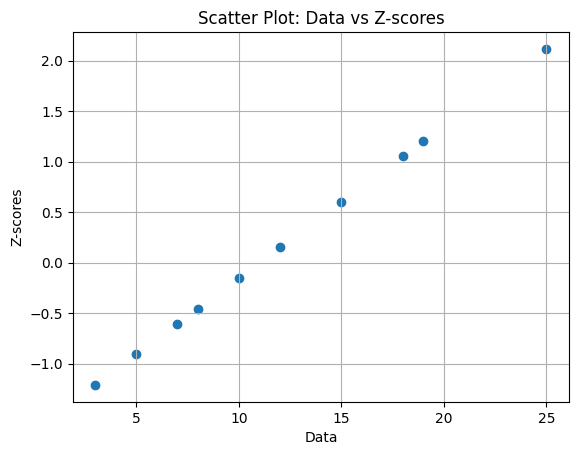

In [38]:
import matplotlib.pyplot as plt

# Example: Scatter plot of data vs z_scores
plt.scatter(data, z_scores)
plt.xlabel('Data')
plt.ylabel('Z-scores')
plt.title('Scatter Plot: Data vs Z-scores')
plt.grid(True)
plt.show()

### Box plot
Shows median(Q2), Q1, Q3, Lower bound, upper bound, outliers

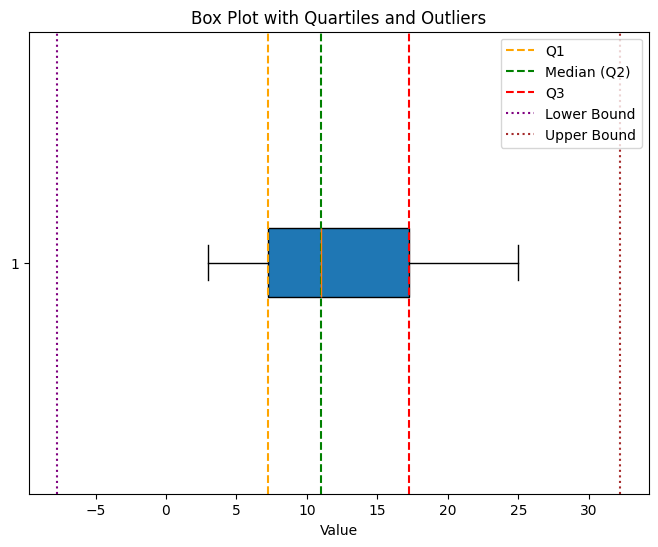

In [39]:
plt.figure(figsize=(8, 6))
plt.boxplot(data, vert=False, patch_artist=True)
plt.title('Box Plot with Quartiles and Outliers')
plt.xlabel('Value')

# Plot Q1, Median(Q2), Q3, Lower Bound, Upper Bound
plt.axvline(q1, color='orange', linestyle='--', label='Q1')
plt.axvline(q2, color='green', linestyle='--', label='Median (Q2)')
plt.axvline(q3, color='red', linestyle='--', label='Q3')
plt.axvline(lower_bound, color='purple', linestyle=':', label='Lower Bound')
plt.axvline(upper_bound, color='brown', linestyle=':', label='Upper Bound')

# Find outliers
outliers = [x for x in data if x < lower_bound or x > upper_bound]
for outlier in outliers:
    plt.scatter(outlier, 1, color='black', zorder=5, label='Outlier' if outlier == outliers[0] else "")

plt.legend()
plt.show()

### Histogram
Frequency/relative frequency

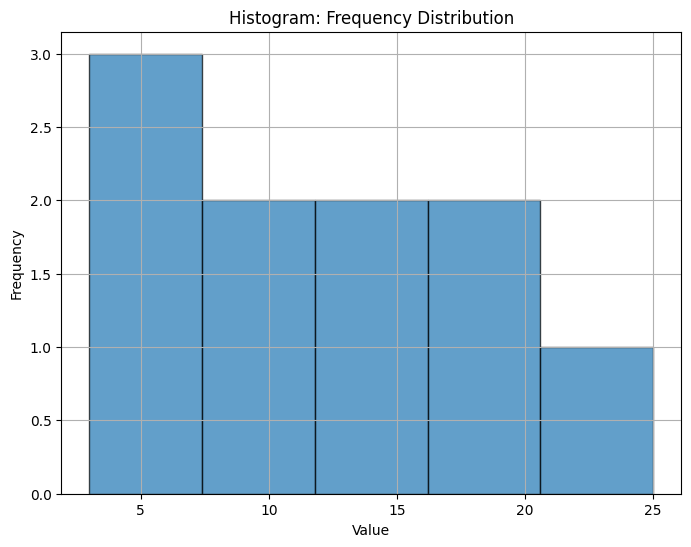

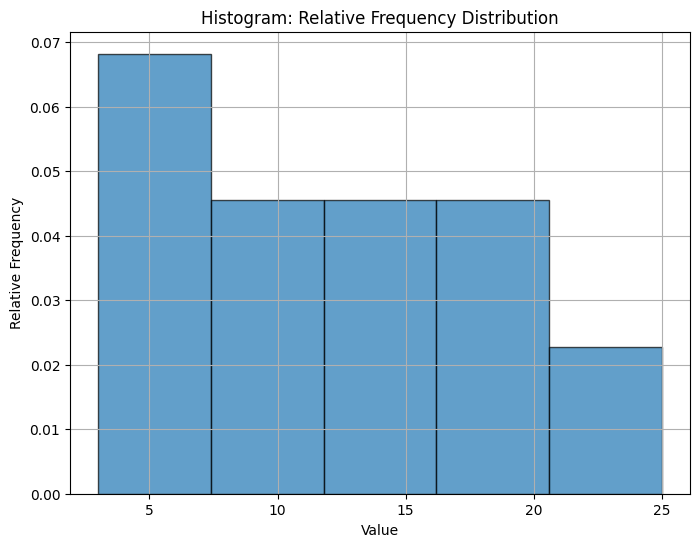

In [41]:
plt.figure(figsize=(8, 6))
plt.hist(data, bins='auto', edgecolor='black', alpha=0.7, density=False)
plt.title('Histogram: Frequency Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(data, bins='auto', edgecolor='black', alpha=0.7, density=True)
plt.title('Histogram: Relative Frequency Distribution')
plt.xlabel('Value')
plt.ylabel('Relative Frequency')
plt.grid(True)
plt.show()

### Probability density function

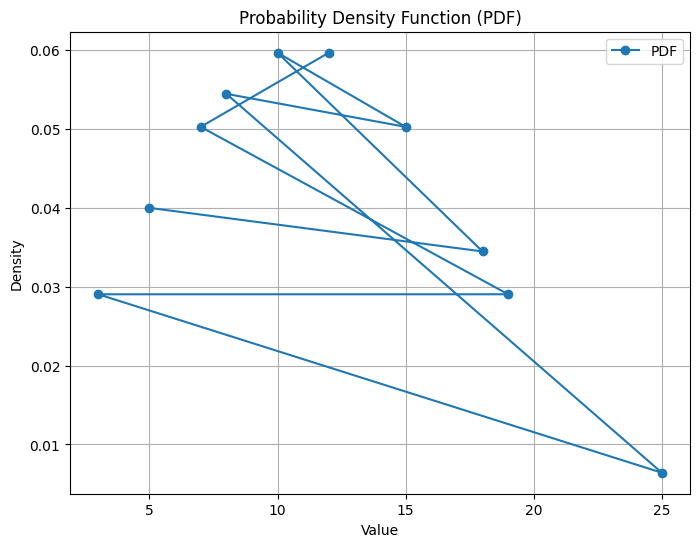

In [42]:
from scipy.stats import norm
import numpy as np


# Calculate the probability density function (PDF) for each value in data
pdf_values = norm.pdf(data, loc=mean, scale=std_dev)

plt.figure(figsize=(8, 6))
plt.plot(data, pdf_values, 'o-', label='PDF')
plt.title('Probability Density Function (PDF)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.show()


### Cumulative density function

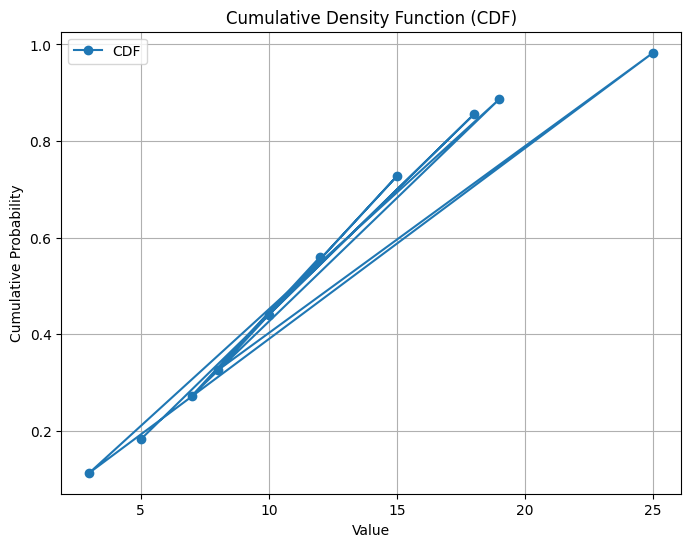

In [43]:
# Calculate the cumulative density function (CDF) for each value in data
cdf_values = norm.cdf(data, loc=mean, scale=std_dev)

plt.figure(figsize=(8, 6))
plt.plot(data, cdf_values, 'o-', label='CDF')
plt.title('Cumulative Density Function (CDF)')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.legend()
plt.show()